In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
    user='root',
    password='****************************',
    host='localhost',
    database='ecommerce_store'
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing first 5 records from each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

#  ***Identify the total number of customers City wise.***

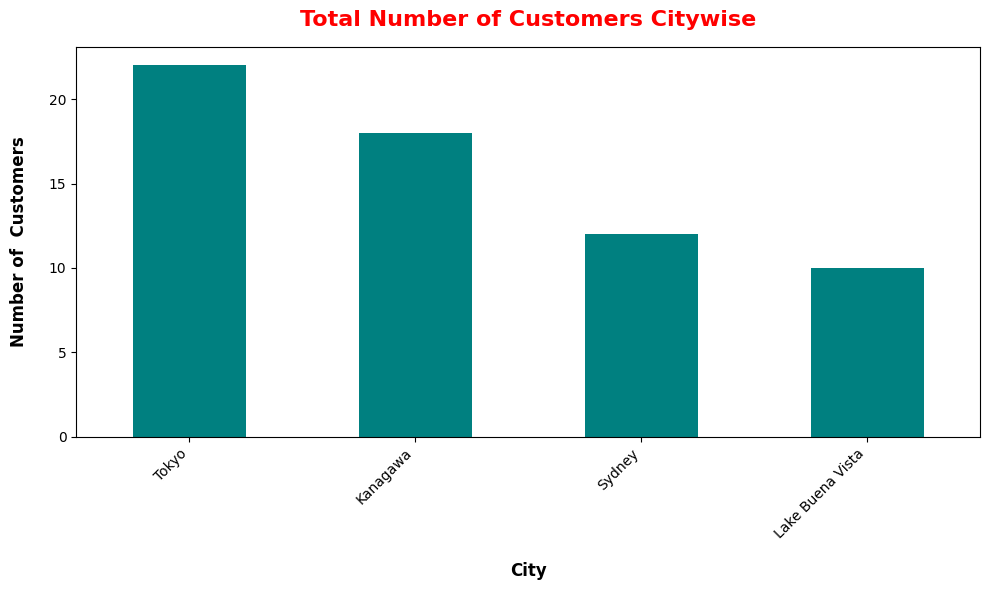

In [12]:
city_counts= customer_data['city'].value_counts()

  #Ploting the bar graph
plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color= 'teal')
plt.title('Total Number of Customers Citywise', fontweight='bold', fontsize='16', pad=15, color='red')
plt.xlabel('City', fontweight='bold', fontsize='12', labelpad=15)
plt.ylabel('Number of  Customers', fontweight='bold', fontsize='12', labelpad=15)
plt.xticks(rotation=45, ha= 'right') # Rotate city names for better readability
plt.tight_layout()   # Adjust layout to prevent clipping of labels
plt.show()

# ***Identify the most frequent customers based on their order history.***

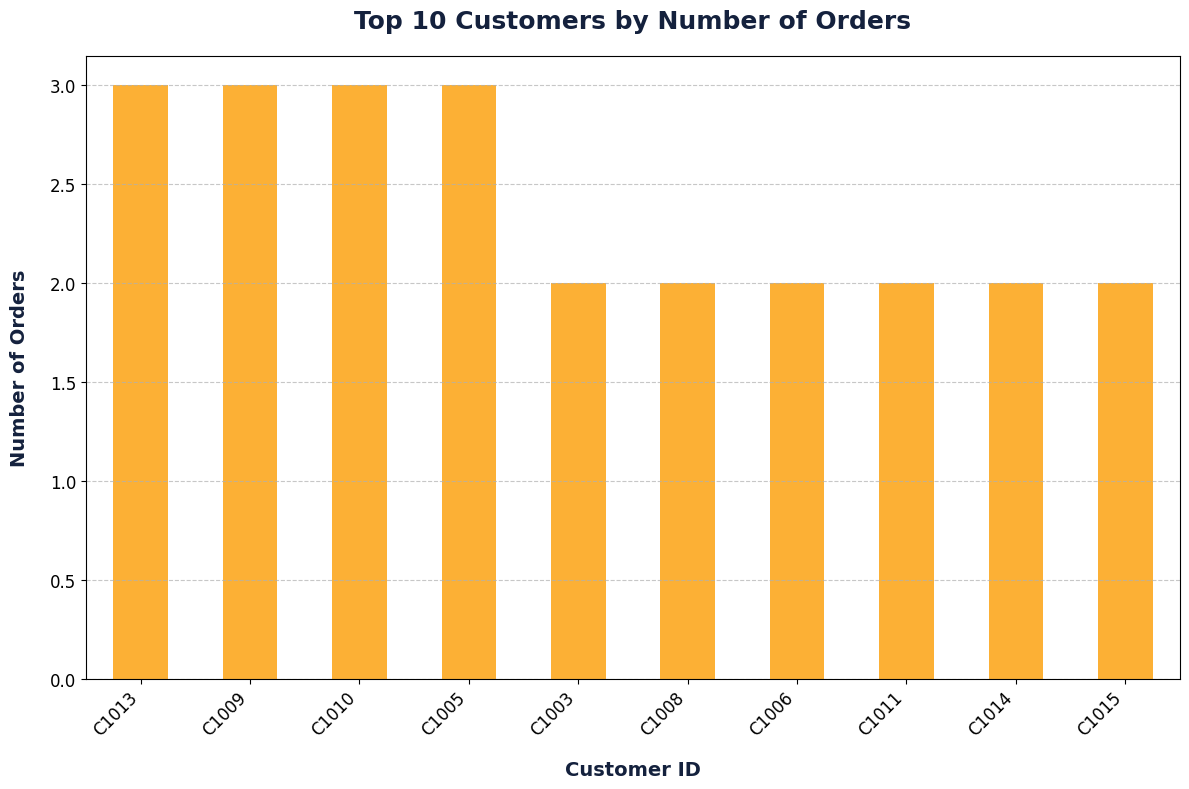

In [13]:
# Calculate the number of orders for each customer
customer_order_counts = order_data['customer_id'].value_counts()

# Select the top 10 customers with the highest number of orders
top_10_customers = customer_order_counts.head(10)

# Set up plot
plt.figure(figsize=(12, 8))

# Plotting the bar graph with custom styling
top_10_customers.plot(kind='bar', color='#fca311', alpha=0.85)

# Adding title and labels with custom font properties
plt.title('Top 10 Customers by Number of Orders', fontsize=18, fontweight='bold', pad=20,color= '#14213d')
plt.xlabel('Customer ID', fontsize=14, fontweight='bold', labelpad=15, color= '#14213d')
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold', labelpad=15, color= '#14213d')

# Adjusting tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()


#  ***Determine the total number of products available by category.***

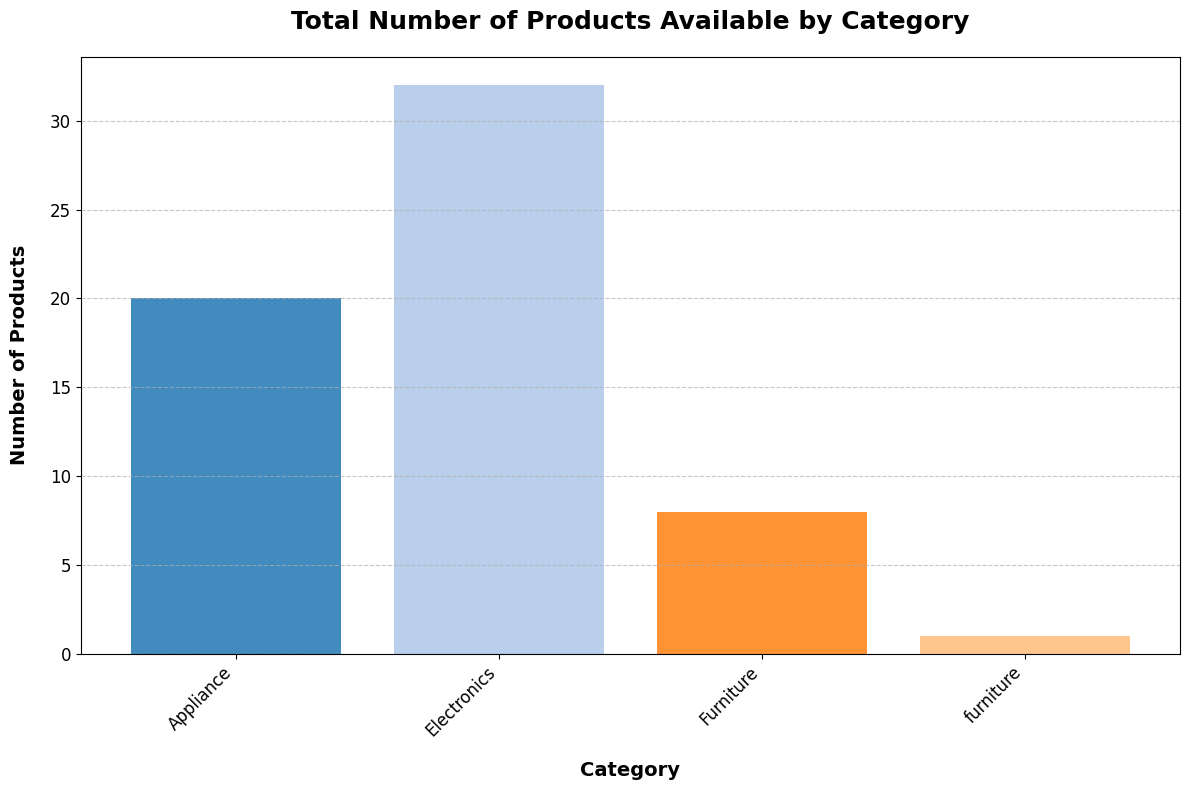

In [14]:
# Calculate the total number of products available in each category
products_by_category = product_data['category'].value_counts()

# Sort the categories alphabetically
products_by_category = products_by_category.sort_index()

# Set up plot
plt.figure(figsize=(12, 8))

# Plotting the column chart with custom styling
plt.bar(products_by_category.index, products_by_category.values, color=plt.cm.tab20.colors, alpha=0.85)

# Adding title and labels with custom font properties
plt.title('Total Number of Products Available by Category', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Number of Products', fontsize=14, fontweight='bold', labelpad=15)

# Adjusting tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()

# Analyze the distribution of products across sub-categories

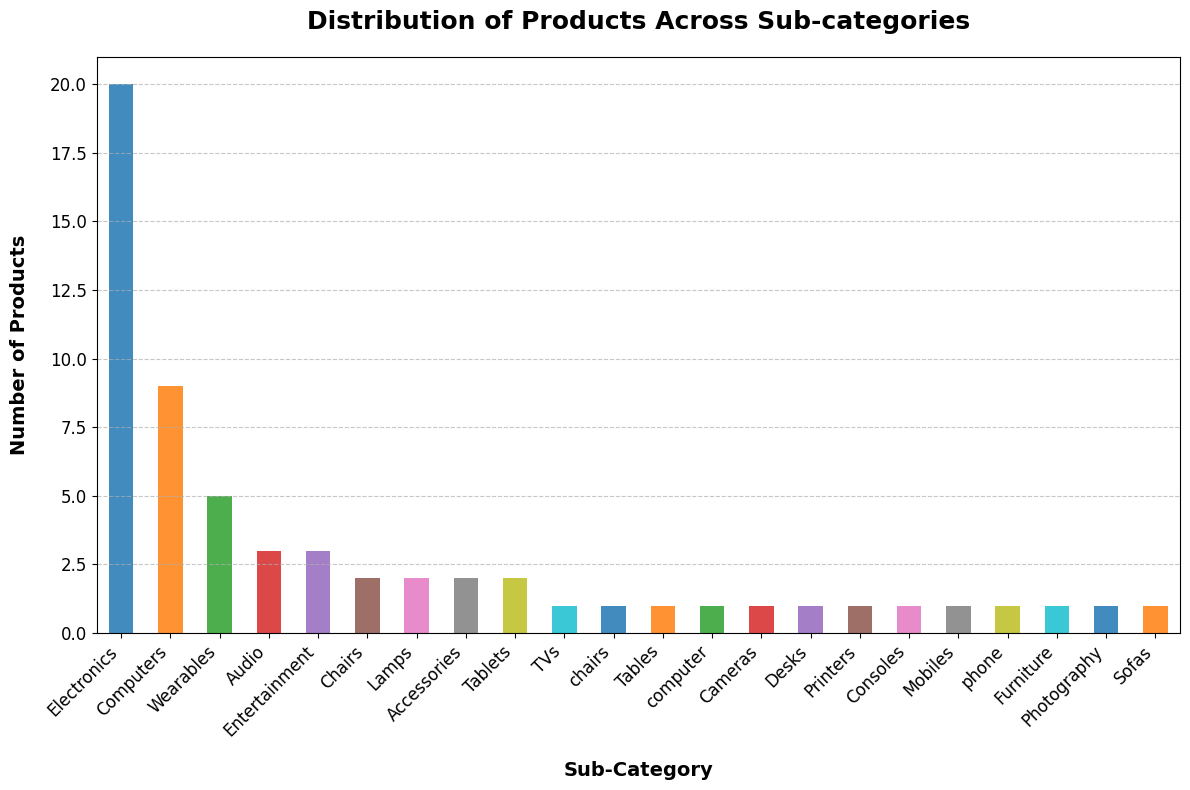

In [15]:

# Calculate the total number of products in each sub-category
sub_category_counts = product_data['sub_category'].value_counts()

# Set up a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting the bar graph with custom styling
plt.figure(figsize=(12, 8))
sub_category_counts.plot(kind='bar', color=custom_palette, alpha=0.85)

# Adding title and labels with custom font properties
plt.title('Distribution of Products Across Sub-categories', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Sub-Category', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Number of Products', fontsize=14, fontweight='bold', labelpad=15)

# Adjusting tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()


#  ***Identify products with low stock levels.***

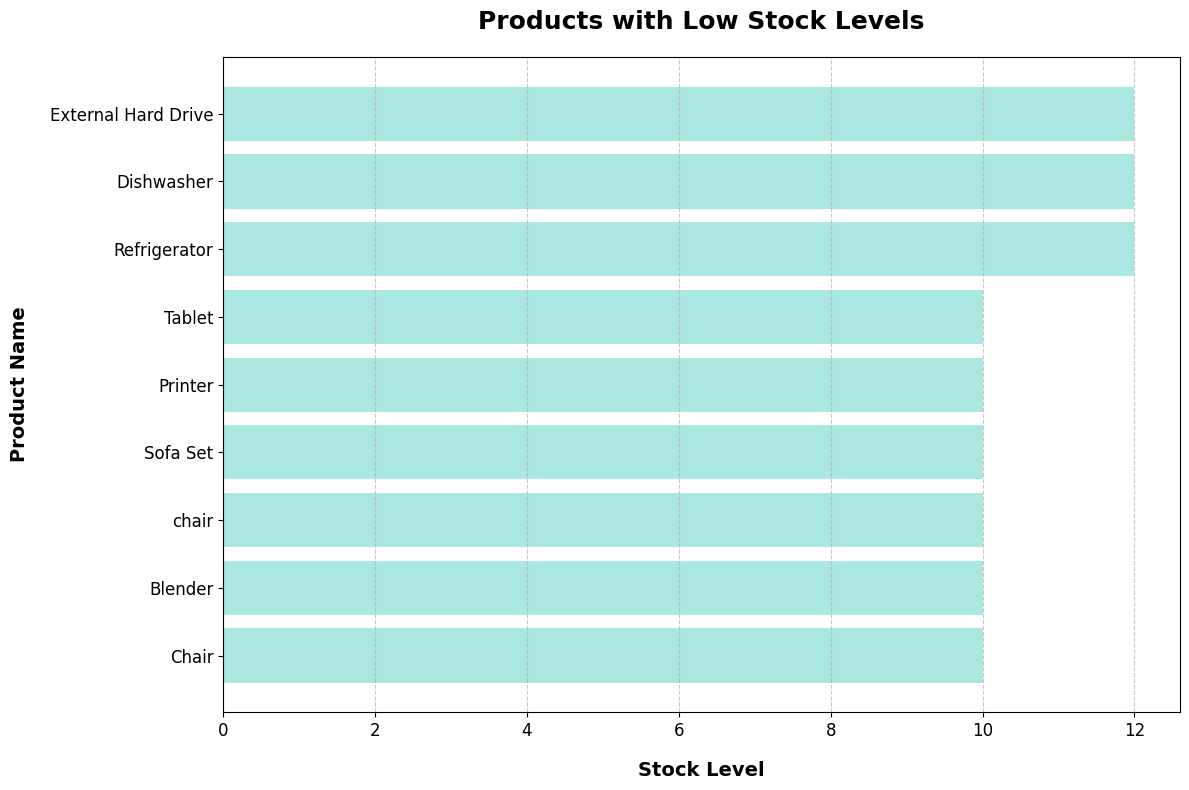

In [16]:
import matplotlib.pyplot as plt

# Filter products with low stock levels (for example, below 15)
low_stock_products = product_data[product_data['stock'] < 15]

# Sort low stock products by stock level
low_stock_products = low_stock_products.sort_values(by='stock')

# Set up a custom color palette
custom_color = '#2ec4b6'  # Light  color

# Plotting the horizontal bar chart with custom styling
plt.figure(figsize=(12, 8))
plt.barh(low_stock_products['product_name'], low_stock_products['stock'], color=custom_color, alpha=0.4)

# Adding title and labels with custom font properties
plt.title('Products with Low Stock Levels', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Stock Level', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Product Name', fontsize=14, fontweight='bold', labelpad=15)

# Adjusting tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()


# ***Calculate the average, maximum, and minimum selling prices for products***

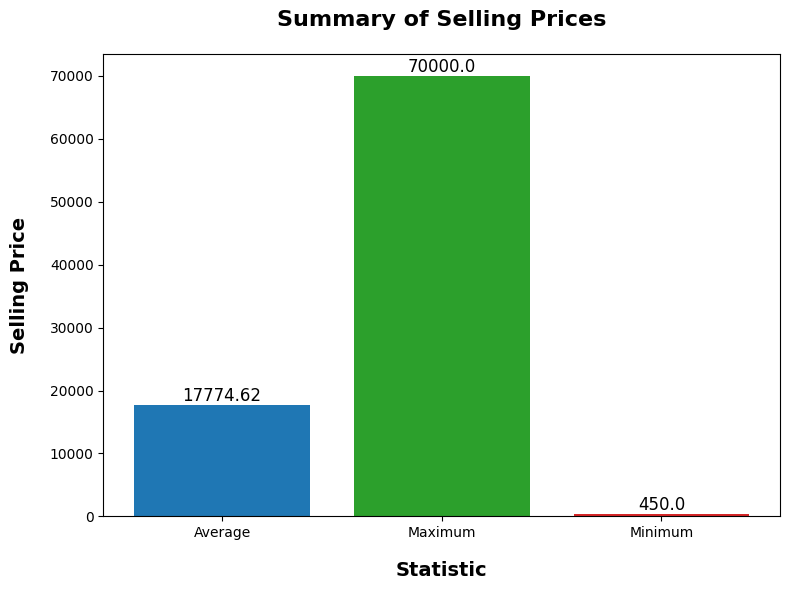

In [17]:

# Calculate average, maximum, and minimum selling prices
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()

# Set up custom colors for each bar
colors = ['#1f77b4', '#2ca02c', '#d62728']

# Create a bar plot with custom styling
plt.figure(figsize=(8, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_selling_price, maximum_selling_price, minimum_selling_price], color=colors)

# Adding data labels on top of each bar
for i, v in enumerate([average_selling_price, maximum_selling_price, minimum_selling_price]):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', fontsize=12)


# Adding title and labels with custom font properties
plt.title('Summary of Selling Prices', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Statistic', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Selling Price', fontsize=14, fontweight='bold', labelpad=15)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()


# ● Order Analysis:


#  ***Calculate the top 10 orders product wise***

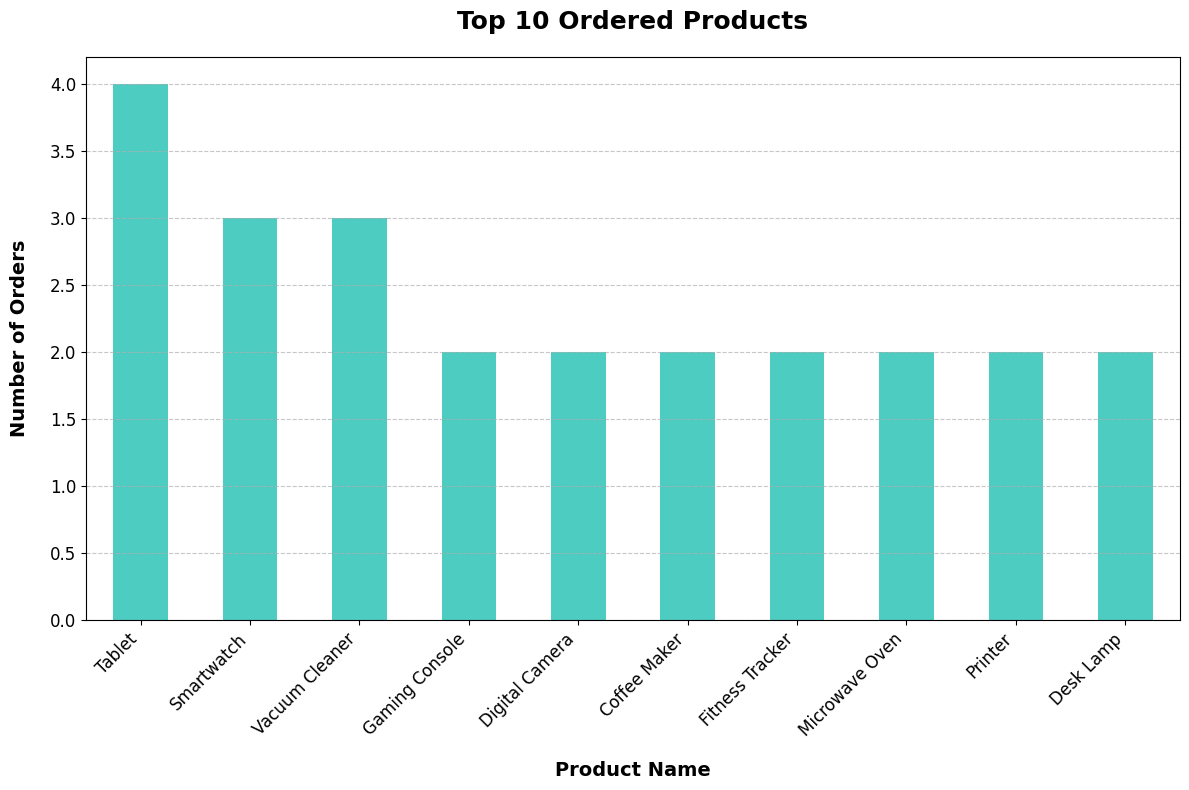

In [18]:

# Retrieve the top 10 orders product-wise
top_10_orders = product_data['product_name'].value_counts().head(10)

# Set up a custom color palette
custom_color = '#2ec4b6'

# Plotting the bar graph with custom styling
plt.figure(figsize=(12, 8))
top_10_orders.plot(kind='bar', color=custom_color, alpha=0.85)

# Adding title and labels with custom font properties
plt.title('Top 10 Ordered Products', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Product Name', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold', labelpad=15)

# Adjusting tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()


# ***Analyze the order status distribution (e.g., pending, delivered).***

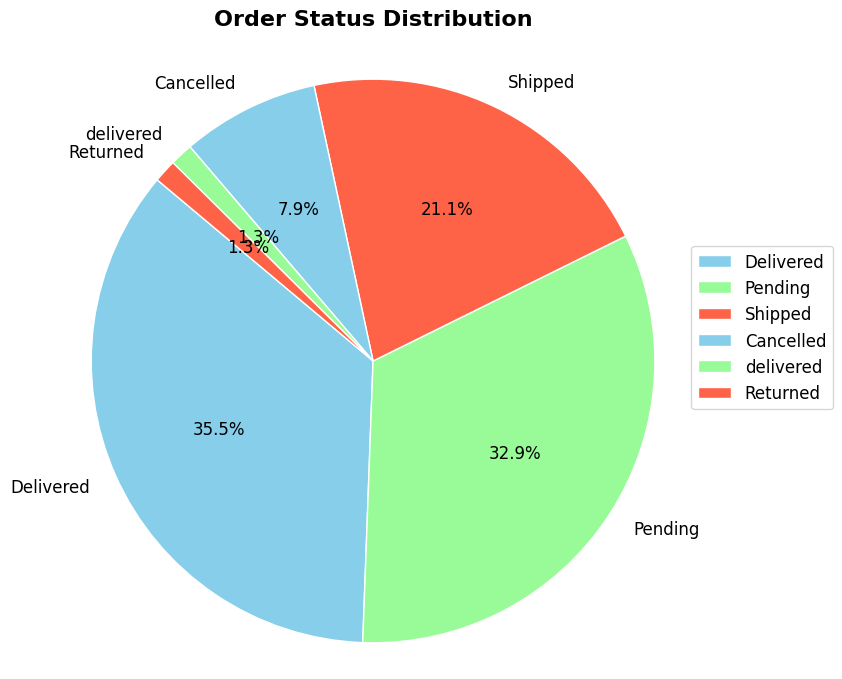

In [19]:

# Count the number of orders for each status
order_status_counts = order_data['order_status'].value_counts()

# Define custom colors for the pie chart
custom_colors = ['#87CEEB', '#98FB98', '#FF6347']

# Create a pie chart with custom styling
plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, textprops={'fontsize': 12}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Order Status Distribution', fontsize=16, fontweight='bold', pad=20)
# Move the legend outside the pie chart
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.7), fontsize=12)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# ○ Identify the most popular products based on order quantity.

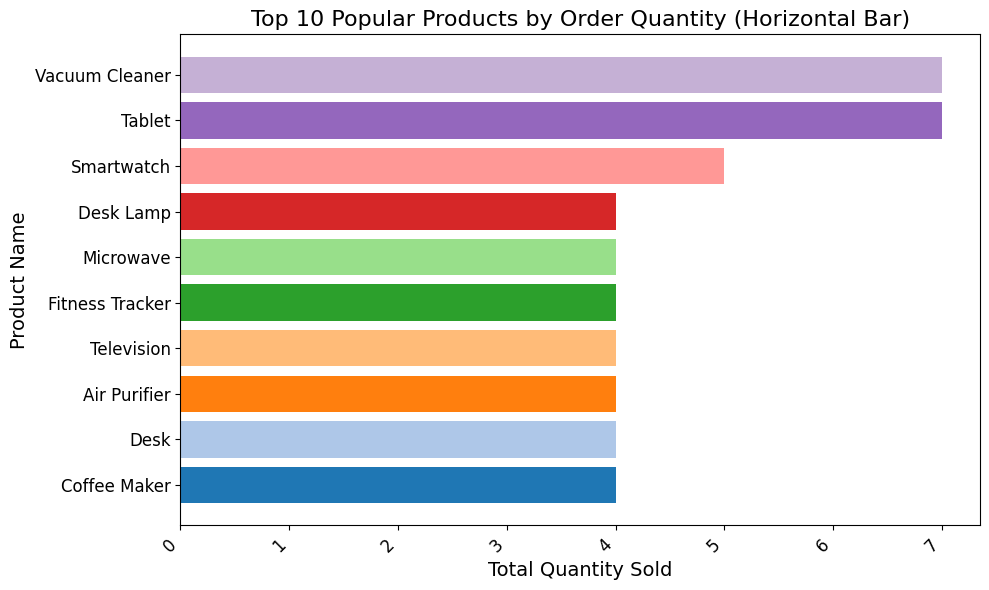

In [20]:
# Merge order data with product data based on product ID
merged_data = pd.merge(order_data, product_data, on='product_id')

# Calculate revenue for each order
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Sort products based on total quantity sold
top_products = product_quantity_sold.sort_values(ascending=False).head(10)

# Reverse the order of the products
top_products = top_products.iloc[::-1]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_products.index, top_products.values, color=plt.cm.tab20.colors)
plt.title('Top 10 Popular Products by Order Quantity (Horizontal Bar)', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# ● ***Sales Analysis: ○ Calculate total revenue generated from orders product wise***

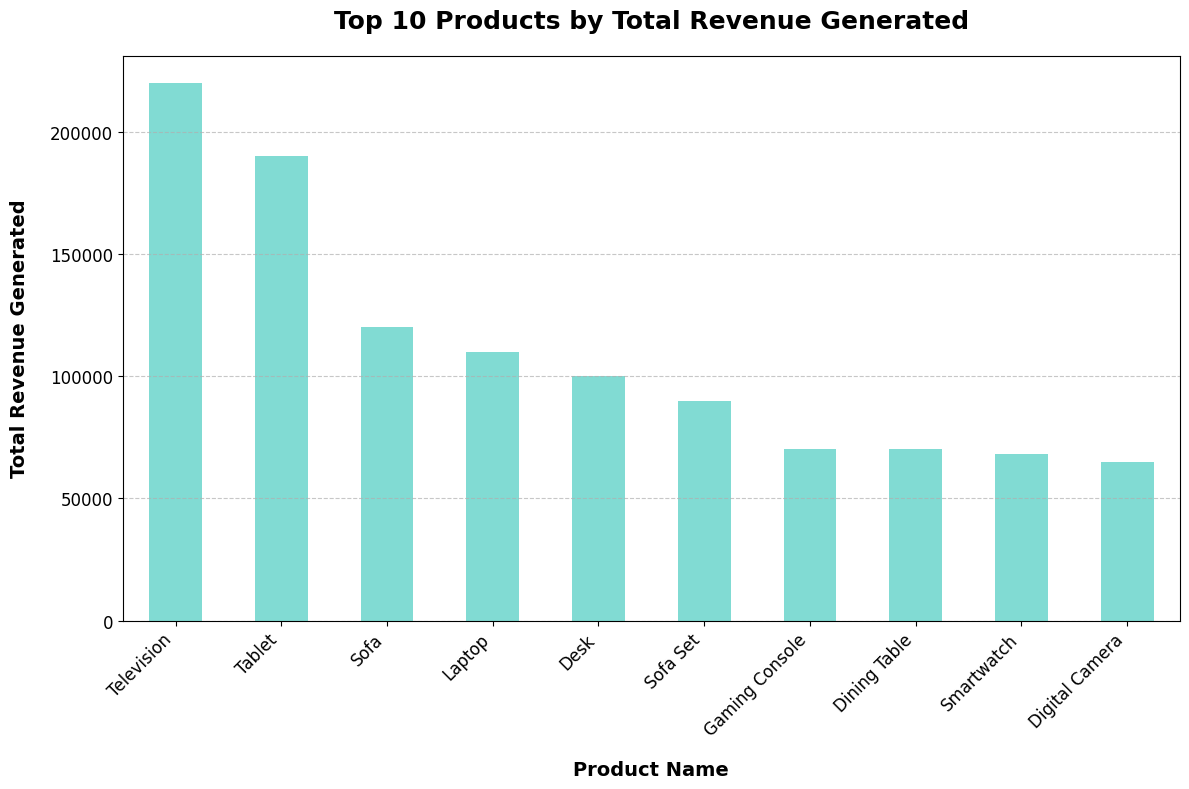

In [21]:
# Group merged data by product name and sum the revenues
product_revenue = merged_data.groupby('product_name')['revenue'].sum()

# Merge order data with product data based on product ID
merged_data = pd.merge(order_data, product_data, on='product_id')

# Calculate revenue for each order
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Sort products based on total revenue generated
top_products_revenue = product_revenue.sort_values(ascending=False).head(10)

# Create a bar plot with custom styling
plt.figure(figsize=(12, 8))
top_products_revenue.plot(kind='bar', color='#2ec4b6', alpha=0.6)

# Adding title and labels with custom font properties
plt.title('Top 10 Products by Total Revenue Generated', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Product Name', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Total Revenue Generated', fontsize=14, fontweight='bold', labelpad=15)

# Adjusting tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjusting layout and adding grid lines
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


# ***Calculate total revenue product category wise percentage***

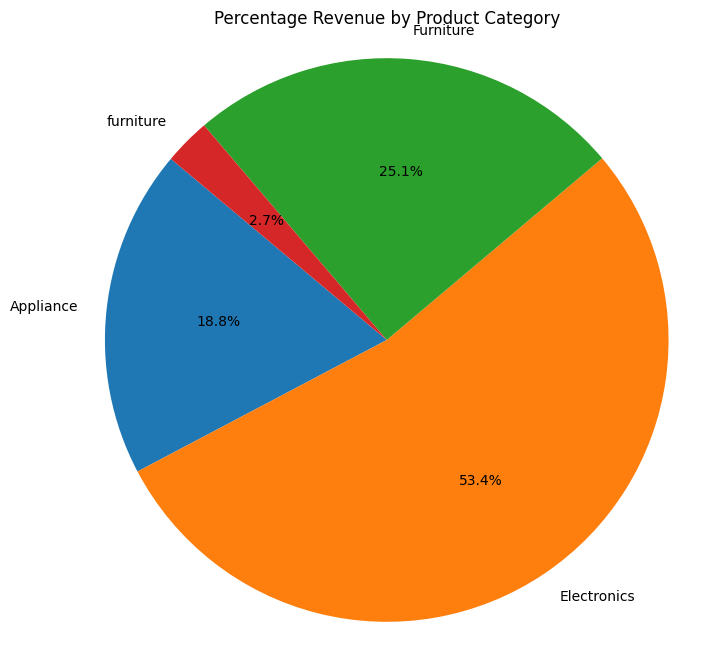

In [23]:

# Merge the category column from product_data into merged_data
merged_data = pd.merge(merged_data, product_data[['product_id', 'category']], on='product_id')

# Group merged data by product category and sum the revenues
category_revenue = merged_data.groupby('category')['revenue'].sum()

# Calculate total revenue across all categories
total_revenue = category_revenue.sum()

# Calculate percentage revenue for each category
category_revenue_percentage = (category_revenue / total_revenue) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Revenue by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# ***Calculate the total revenue generated from all orders***

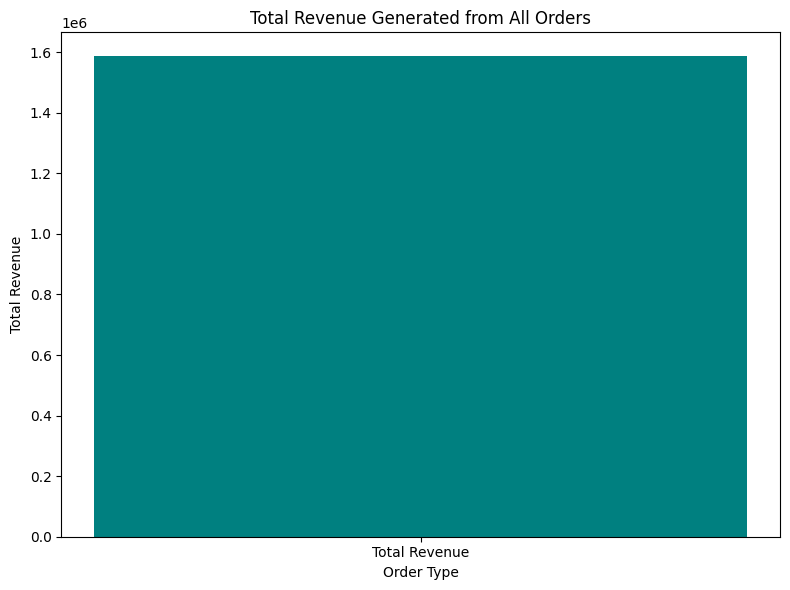

In [ ]:

# Calculate total revenue generated from all orders
total_revenue_all_orders = order_data['total_price'].sum()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue_all_orders], color='teal')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Total Revenue')
plt.xlabel('Order Type')

plt.tight_layout()
plt.show()


# Identify the most profitable products based on the difference between original and selling prices.

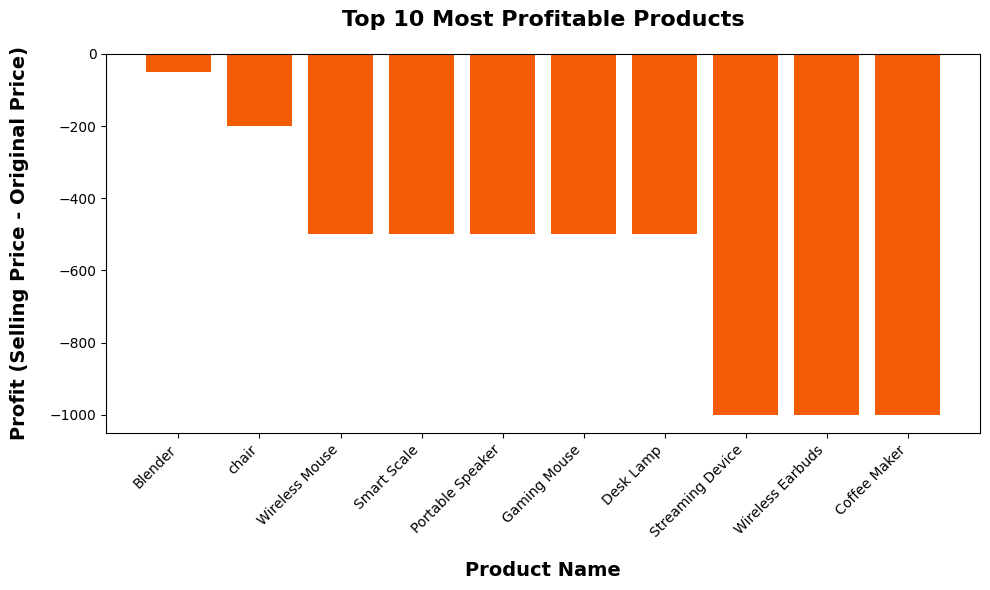

In [ ]:
import matplotlib.pyplot as plt

# Calculate the profit for each product
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

# Sort products based on profit
most_profitable_products = product_data.sort_values(by='profit', ascending=False).head(10)

# Create a bar chart to visualize the most profitable products
plt.figure(figsize=(10, 6))
plt.bar(most_profitable_products['product_name'], most_profitable_products['profit'], color='#f35b04')
plt.title('Top 10 Most Profitable Products', fontsize=16,pad=20, fontweight='bold')
plt.xlabel('Product Name', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Profit (Selling Price - Original Price)', fontsize=14, fontweight='bold', labelpad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ● ***Customer Order Patterns:***
○ Identify product names with the highest and lowest order quantities.

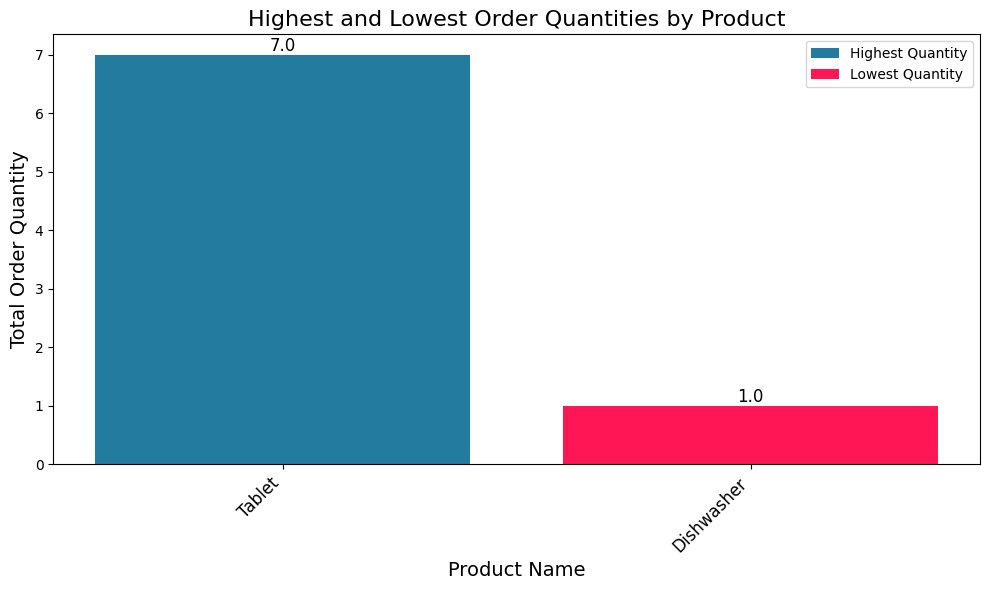

Product with the highest order quantity: Tablet
Highest order quantity: 7.0
Product with the lowest order quantity: Dishwasher
Lowest order quantity: 1.0


In [ ]:

# Merge order_data with product_data on 'product_id'
merged_data = pd.merge(order_data, product_data, on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Identify product with the highest order quantity
highest_quantity_product = product_quantity_sold.idxmax()
highest_quantity = product_quantity_sold.max()

# Identify product with the lowest order quantity
lowest_quantity_product = product_quantity_sold.idxmin()
lowest_quantity = product_quantity_sold.min()

# Create a bar plot for highest and lowest order quantities
plt.figure(figsize=(10, 6))

# Plot bars for highest and lowest order quantities with different colors
plt.bar(highest_quantity_product, highest_quantity, color='#247ba0', label='Highest Quantity')
plt.bar(lowest_quantity_product, lowest_quantity, color='#ff1654', label='Lowest Quantity')

# Add labels with quantity values on top of each bar
plt.text(highest_quantity_product, highest_quantity, str(highest_quantity), ha='center', va='bottom', fontsize=12)
plt.text(lowest_quantity_product, lowest_quantity, str(lowest_quantity), ha='center', va='bottom', fontsize=12)

# Add title and axis labels with increased font size
plt.title('Highest and Lowest Order Quantities by Product', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Order Quantity', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

print("Product with the highest order quantity:", highest_quantity_product)
print("Highest order quantity:", highest_quantity)
print("Product with the lowest order quantity:", lowest_quantity_product)
print("Lowest order quantity:", lowest_quantity)


# ***Identify customers with the highest and lowest order quantities by customer name.***

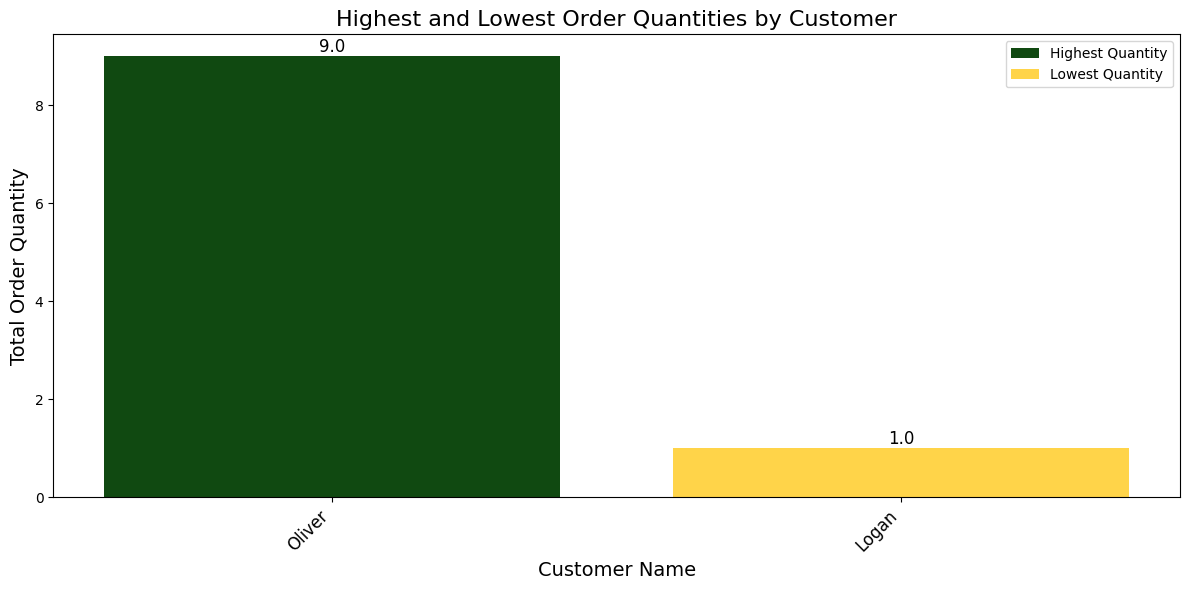

Customer with the highest order quantity: Oliver
Highest order quantity: 9.0
Customer with the lowest order quantity: Logan
Lowest order quantity: 1.0


In [ ]:

# Merge order_data with customer_data on 'customer_id'
merged_data = pd.merge(order_data, customer_data, on='customer_id')

# Group merged data by customer name and sum the quantities
customer_quantity_sold = merged_data.groupby('name')['quantity'].sum()

# Sort customers based on their order quantities
sorted_customers = customer_quantity_sold.sort_values(ascending=False)

# Identify customer with the highest order quantity
highest_quantity_customer = sorted_customers.idxmax()
highest_quantity = sorted_customers.max()

# Identify customer with the lowest order quantity
lowest_quantity_customer = sorted_customers.idxmin()
lowest_quantity = sorted_customers.min()

# Create a bar plot for highest and lowest order quantities by customer
plt.figure(figsize=(12, 6))

# Plot bars for highest and lowest order quantities with different colors
plt.bar(highest_quantity_customer, highest_quantity, color='#104911', label='Highest Quantity')
plt.bar(lowest_quantity_customer, lowest_quantity, color='#ffd449', label='Lowest Quantity')

# Add labels with quantity values on top of each bar
plt.text(highest_quantity_customer, highest_quantity, str(highest_quantity), ha='center', va='bottom', fontsize=12)
plt.text(lowest_quantity_customer, lowest_quantity, str(lowest_quantity), ha='center', va='bottom', fontsize=12)

# Add title and axis labels with increased font size
plt.title('Highest and Lowest Order Quantities by Customer', fontsize=16)
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Total Order Quantity', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

print("Customer with the highest order quantity:", highest_quantity_customer)
print("Highest order quantity:", highest_quantity)
print("Customer with the lowest order quantity:", lowest_quantity_customer)
print("Lowest order quantity:", lowest_quantity)


# ***Determine the most preferred payment modes***

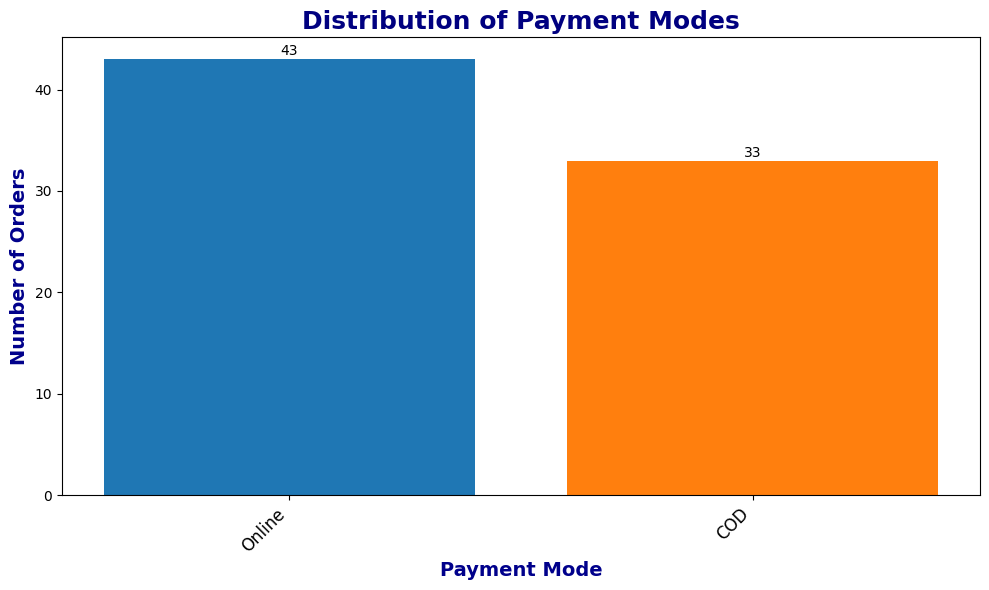

In [ ]:

# Group orders by payment mode and count the number of orders for each mode
payment_mode_counts = order_data['payment_mode'].value_counts()

colors=['#1f77b4', '#ff7f0e']
# Create a bar plot to visualize the distribution of payment modes
plt.figure(figsize=(10, 6))
bars = plt.bar(payment_mode_counts.index, payment_mode_counts.values, color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add title with customized font properties
plt.title('Distribution of Payment Modes', fontsize=18, fontweight='bold', color='navy')

# Add axis labels with customized font properties
plt.xlabel('Payment Mode', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold', color='darkblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


# ● ***Time-based Analysis:***

# ○ ***Month wise total sales.***

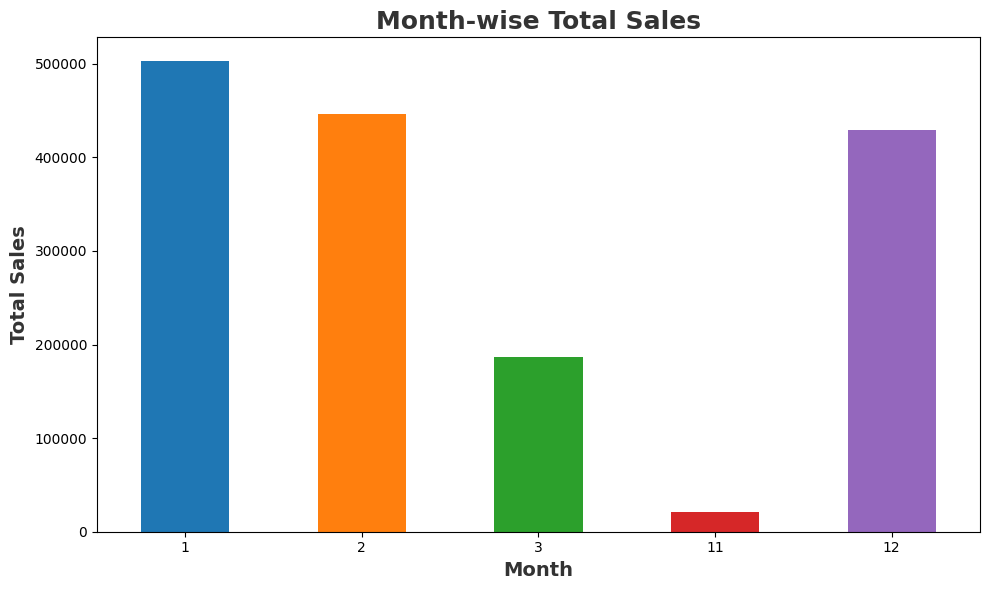

In [ ]:
# Convert order_date to datetime if it's not already in datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month from order_date
order_data['order_month'] = order_data['order_date'].dt.month

# Group orders by month and calculate total sales for each month
monthly_sales = order_data.groupby('order_month')['total_price'].sum()

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a bar plot to visualize month-wise total sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color=custom_colors)


# Customize the title, xlabel, and ylabel
plt.title('Month-wise Total Sales', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Total Sales', fontsize=14, fontweight='bold', color='#333333')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# ***Month and year wise total sales***


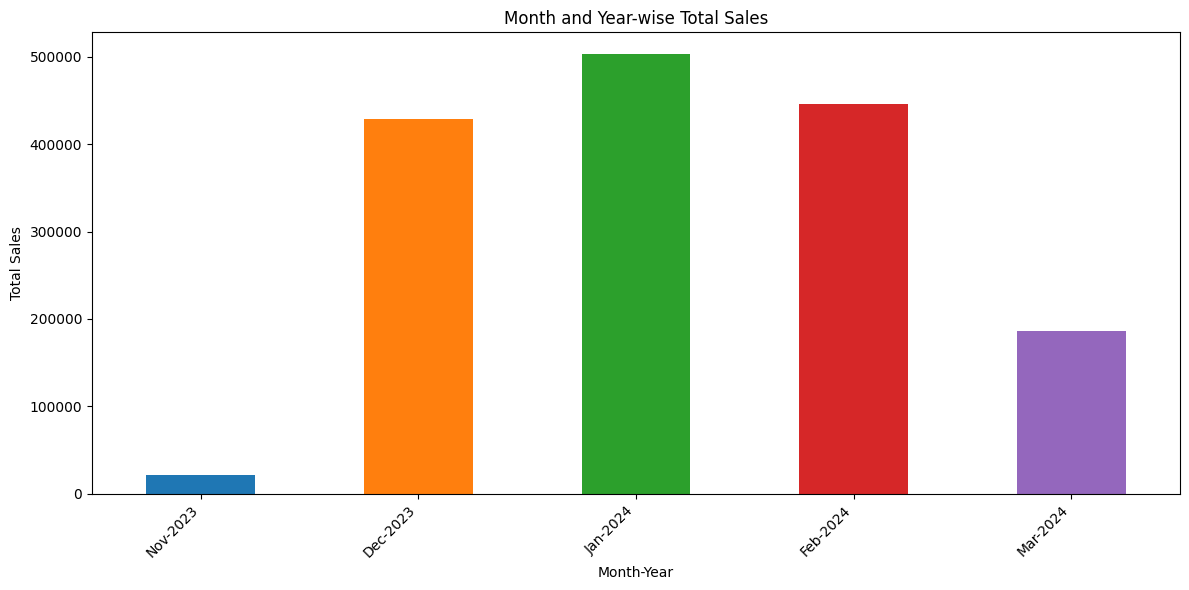

In [ ]:
import calendar

# Convert 'order_date' to datetime if it's not already in datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract year from 'order_date' and create 'order_year' column
order_data['order_year'] = order_data['order_date'].dt.year
monthly_sales = order_data.groupby(['order_year', 'order_month'])['total_price'].sum()

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a bar plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color=custom_colors)

# Set x-axis labels to month and year combinations
labels = [f"{calendar.month_abbr[month]}-{year}" for year, month in monthly_sales.index]
plt.xticks(range(len(monthly_sales)), labels, rotation=45, ha='right')

plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# Identify peak order date

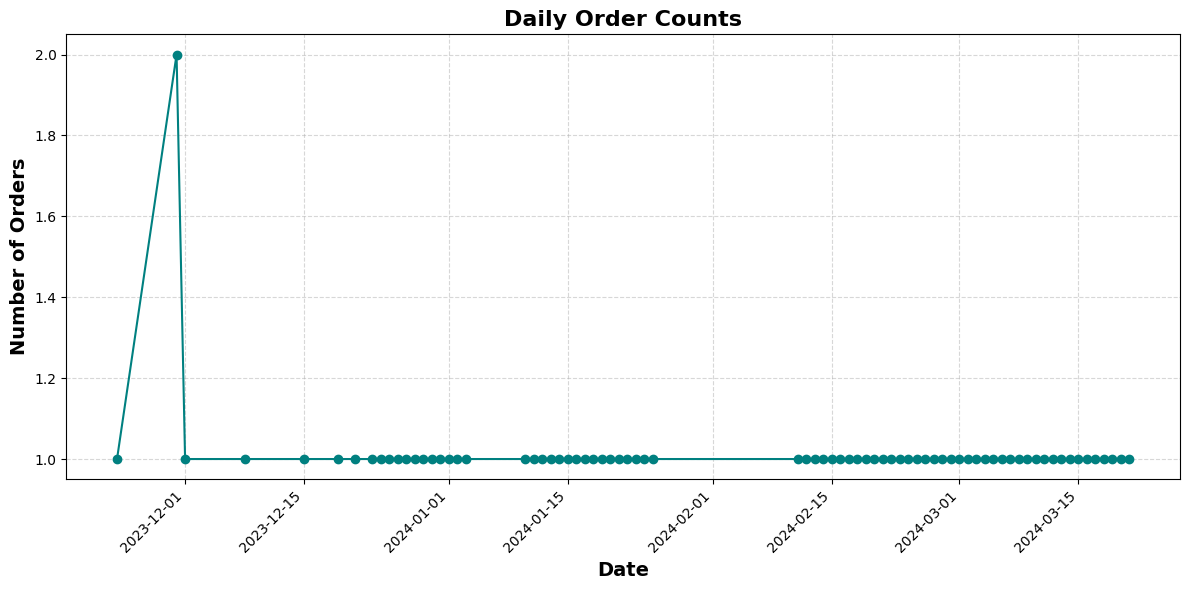

In [ ]:
# Convert order_date to datetime if it's not already in datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Group orders by order date and count the number of orders for each date
daily_orders = order_data.groupby('order_date').size()

# Plot the daily order counts
plt.figure(figsize=(12, 6))
daily_orders.plot(kind='line', color='teal', linestyle='-', marker='o')  # Adjust line style and marker
plt.title('Daily Order Counts', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with dashed style and reduced opacity
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Geographical Analysis:


# ○ Explore the distribution of customers across different cities.

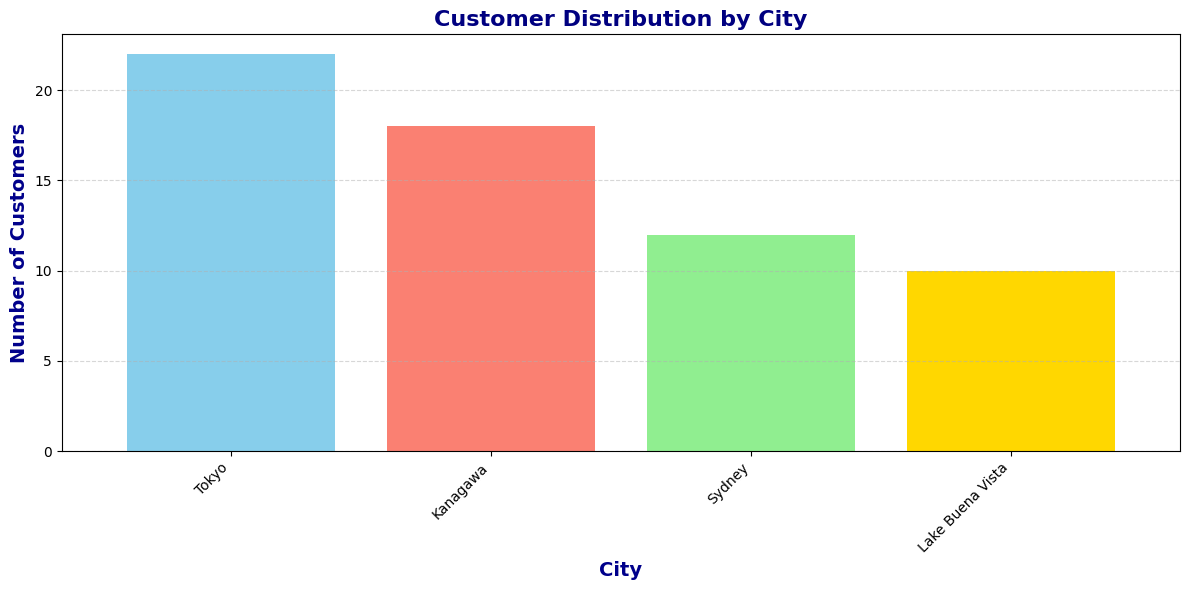

In [ ]:
# Group customers by city and count the number of customers in each city
city_distribution = customer_data['city'].value_counts()
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightblue']

# Plot the distribution of customers across different cities
plt.figure(figsize=(12, 6))  # Increase figure size
city_distribution.plot(kind='bar', color=custom_colors, width=0.8)  # Adjust bar width

city_distribution.plot(kind='bar', color=custom_colors, width=0.8)  # Adjust bar width
plt.title('Customer Distribution by City', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('City', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Number of Customers', fontsize=14, fontweight='bold', color='darkblue')




plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines with dashed style and reduced opacity
plt.tight_layout()
plt.show()


In [ ]:
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

# Analyze whether certain products or categories are more popular in a specific city.

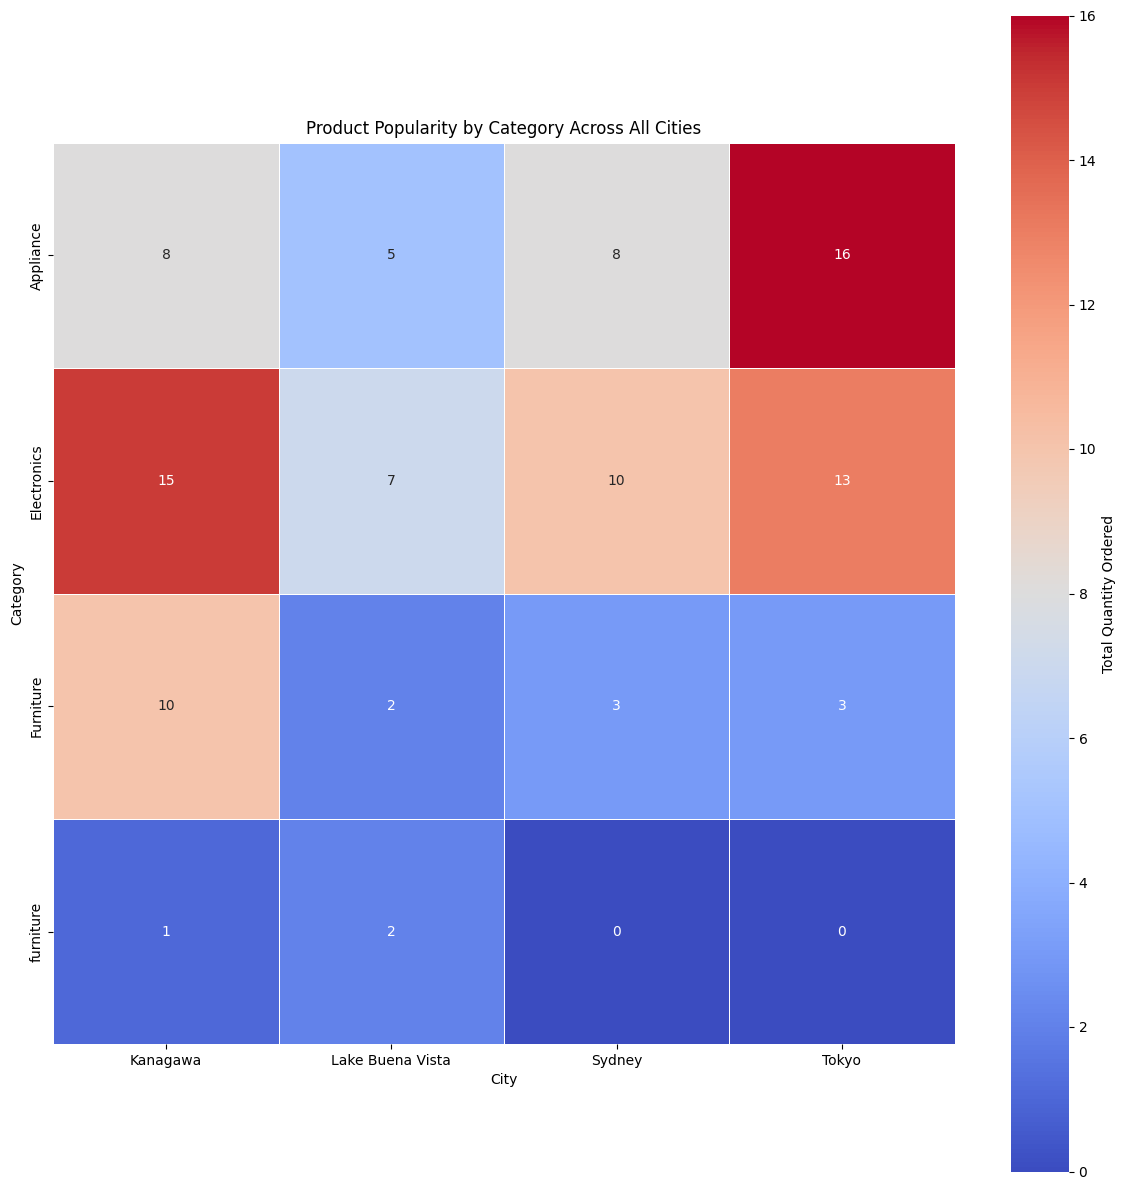

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already fetched the necessary data into DataFrames:
# customer_data, product_data, and order_data

# Joining necessary tables to get product categories and cities
merged_data = order_data.merge(product_data, on='product_id').merge(customer_data, on='customer_id')

# Grouping by category and city and calculating total quantity ordered
category_city_popularity = merged_data.groupby(['category', 'city']).agg({'quantity': 'sum'}).reset_index()

# Pivot the DataFrame to have categories as rows and cities as columns
pivot_df = category_city_popularity.pivot(index='category', columns='city', values='quantity')

# Fill missing values (NaN) with zeros
pivot_df = pivot_df.fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed
sns.heatmap(pivot_df, cmap='coolwarm', square=True,annot=True,linewidths=0.5, cbar_kws={'label': 'Total Quantity Ordered'})
plt.title('Product Popularity by Category Across All Cities')
plt.xlabel('City')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# ***Product Performance:***
○ ***Identify the best-selling products.***

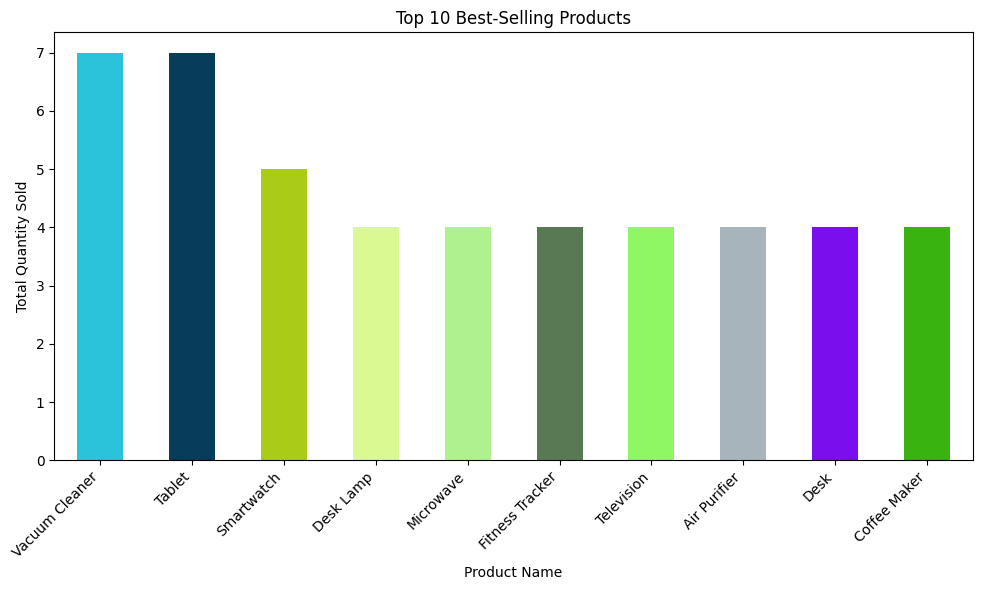

In [ ]:
import numpy as np;

color_palette = ['#' + ''.join([np.random.choice(list('0123456789ABCDEF')) for j in range(6)]) for i in range(10)]

# Merge order_details_data with product_data to get product names
merged_data = pd.merge(order_data, product_data[['product_id', 'product_name']], on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Sort products based on total quantity sold
top_products = product_quantity_sold.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color=color_palette)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Identify top 10 slow-moving products based on low sales.

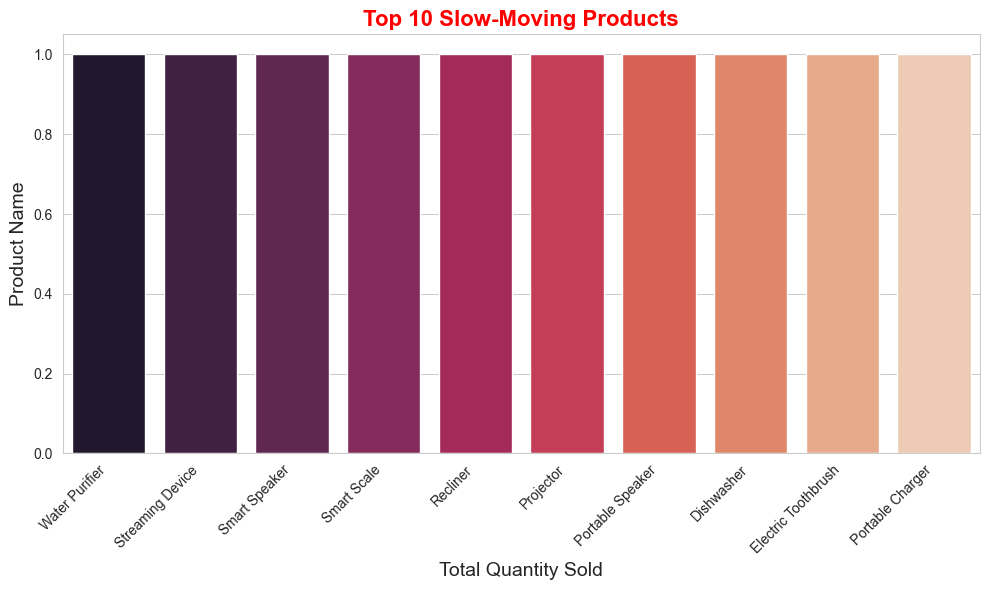

In [ ]:
# Merge order_details_data with product_data to get product names
merged_data = pd.merge(order_data, product_data[['product_id', 'product_name']], on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Sort products based on total quantity sold in ascending order
slowest_products = product_quantity_sold.sort_values().head(10)

# Set the seaborn style
sns.set_style("whitegrid")

# Create a bar plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=slowest_products.values, x=slowest_products.index, palette="rocket",hue=slowest_products.index)
plt.title('Top 10 Slow-Moving Products', fontsize=16, fontweight='bold',color='red')
plt.xlabel('Total Quantity Sold', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Payment Analysis:
○ Display successful and pending payments order counts.

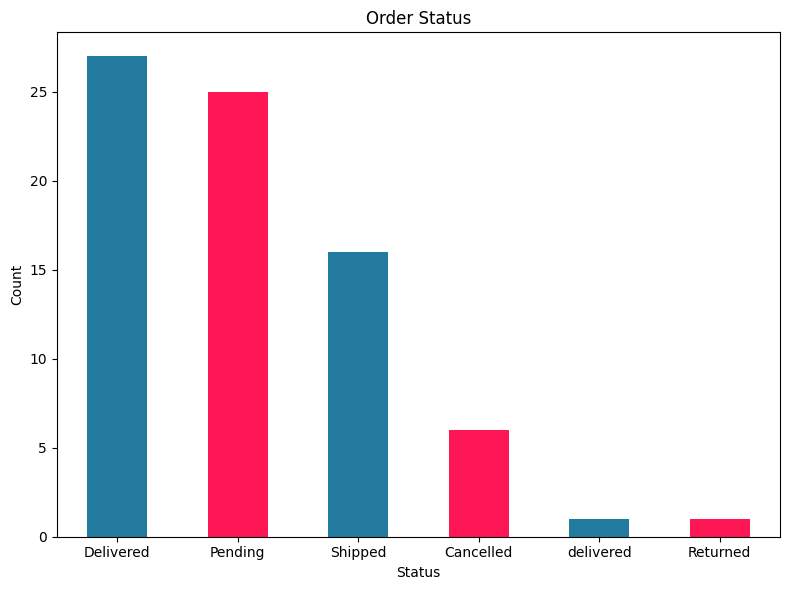

In [ ]:
# Group orders by order status and count the occurrences
order_status_counts = order_data['order_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color=['#247ba0', '#ff1654'])
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# ***Conclusion***

In this project, we analyzed an eCommerce dataset containing information about customers, products, and orders. We utilized Python with libraries such as pandas, matplotlib, and seaborn to explore and visualize the data, gaining insights into customer behavior and product performance.

Throughout the project, we leveraged data visualization techniques such as bar plots and heatmaps to present our findings effectively. Visualizations not only facilitate easier interpretation of data but also enable stakeholders to grasp key insights at a glance.

**In conclusion, this project demonstrates the value of data analysis and visualization in understanding customer behavior, product performance, and market dynamics in an eCommerce business. By leveraging data-driven insights, businesses can make informed decisions to drive growth, improve customer satisfaction, and maximize profitability.**